# **Install Requirements**

In [ ]:
!pip install roboflow
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


# **Cloning Repository Ultralytics**

In [ ]:
!git clone 'https://github.com/ultralytics/ultralytics.git'

Cloning into 'ultralytics'...
remote: Enumerating objects: 17975, done.
remote: Counting objects: 100% (887/887), done.
remote: Compressing objects: 100% (555/555), done.
remote: Total 17975 (delta 491), reused 583 (delta 311), pack-reused 17088
Receiving objects: 100% (17975/17975), 9.88 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (12433/12433), done.


In [ ]:
!cd /content/ultralytics
!pip install -r /content/ultralytics/requirements.txt

# **Download Dataset**

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="RjDgGcHbqY7lZrzUbvMo")
project = rf.workspace("new-workspace-jyqio").project("dragon-fruit-maturity-detection")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dragon-fruit-maturity-detection-2 in yolov8:: 100%|██████████| 6964/6964 [00:00<00:00, 7898.48it/s]


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!nvidia-smi

Tue Nov 14 05:30:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Data Exploration**

In [ ]:
import os

# Path data training
training_dir = os.path.join('dragon-fruit-maturity-detection-2/train/images')

# Path data validation
validation_dir = os.path.join('dragon-fruit-maturity-detection-2/valid/images')

In [ ]:
# Menampilkan nama file data training
training_names_file = os.listdir(training_dir)
print(training_names_file[:10])

['IMG_20210710_123151_jpg.rf.4353166ca2a06771c5ea2536996e0675.jpg', 'IMG_20210710_142505_jpg.rf.f25c348ed723b4b7b0aa1a6394b182a0.jpg', 'IMG_20210710_144347_jpg.rf.d29112d007e15df28ddf97e5b5337d2d.jpg', 'IMG_20210620_130323_jpg.rf.6fb8eed69d3d7fc1a2bd6ab6125178f5.jpg', 'IMG_20210710_124638_jpg.rf.ffab32d3a8a640e0f831babdcc73bf3d.jpg', 'IMG_20210710_125244_jpg.rf.9e143a905bd0e23a261621f2bb28d079.jpg', 'IMG_20210710_130055_jpg.rf.d25dfe1da0941d14f6624fa62f0147ce.jpg', 'IMG_20210710_142251_jpg.rf.550a8255f9c7cea27bc37dbc7b21f7a4.jpg', 'IMG_20210710_122426_jpg.rf.bfcb03a319da3836fe7841798c4b97e8.jpg', 'IMG_20210620_134036_jpg.rf.35e5985d1884133277dabef23f125521.jpg']


In [ ]:
# Menampilkan nama file data validation
validation_names_files = os.listdir(validation_dir)
print(validation_names_files[:10])

['IMG_20210710_123411_jpg.rf.32ebbc5a1b55b9b4e27b98b61d3b3ce1.jpg', 'IMG_20210710_135622_jpg.rf.b333109c23738fcb73f0788463bec787.jpg', 'IMG_20210710_142232_jpg.rf.79b6645acb9831d2c8429022128b1c1b.jpg', 'IMG_20210620_132108_jpg.rf.6098039d13b6c81eb082f2ad13bfab7d.jpg', 'IMG_20210620_132453_jpg.rf.ec6e17fd10a36af2fe45277e783bc09e.jpg', 'IMG_20210620_135957_jpg.rf.a3ba1145cfdc4e0504cf152d5c078609.jpg', 'IMG_20210620_133951_jpg.rf.206f3665e43cce5614bb7c953f45078f.jpg', 'IMG_20210710_143757_jpg.rf.ad9930c5d519b4af96b7563418b5124a.jpg', 'IMG_20210710_144655_jpg.rf.95dddae97a746991debb7eeba8a2e47c.jpg', 'IMG_20210620_132910_jpg.rf.d6e79b56c3ad8832e12a57f0742cd3c8.jpg']


In [ ]:
# Menampilkan jumlah data training dan validation
print('total data training :', len(os.listdir(training_dir)))
print('total data validation :', len(os.listdir(validation_dir)))

total data training : 2858
total data validation : 412


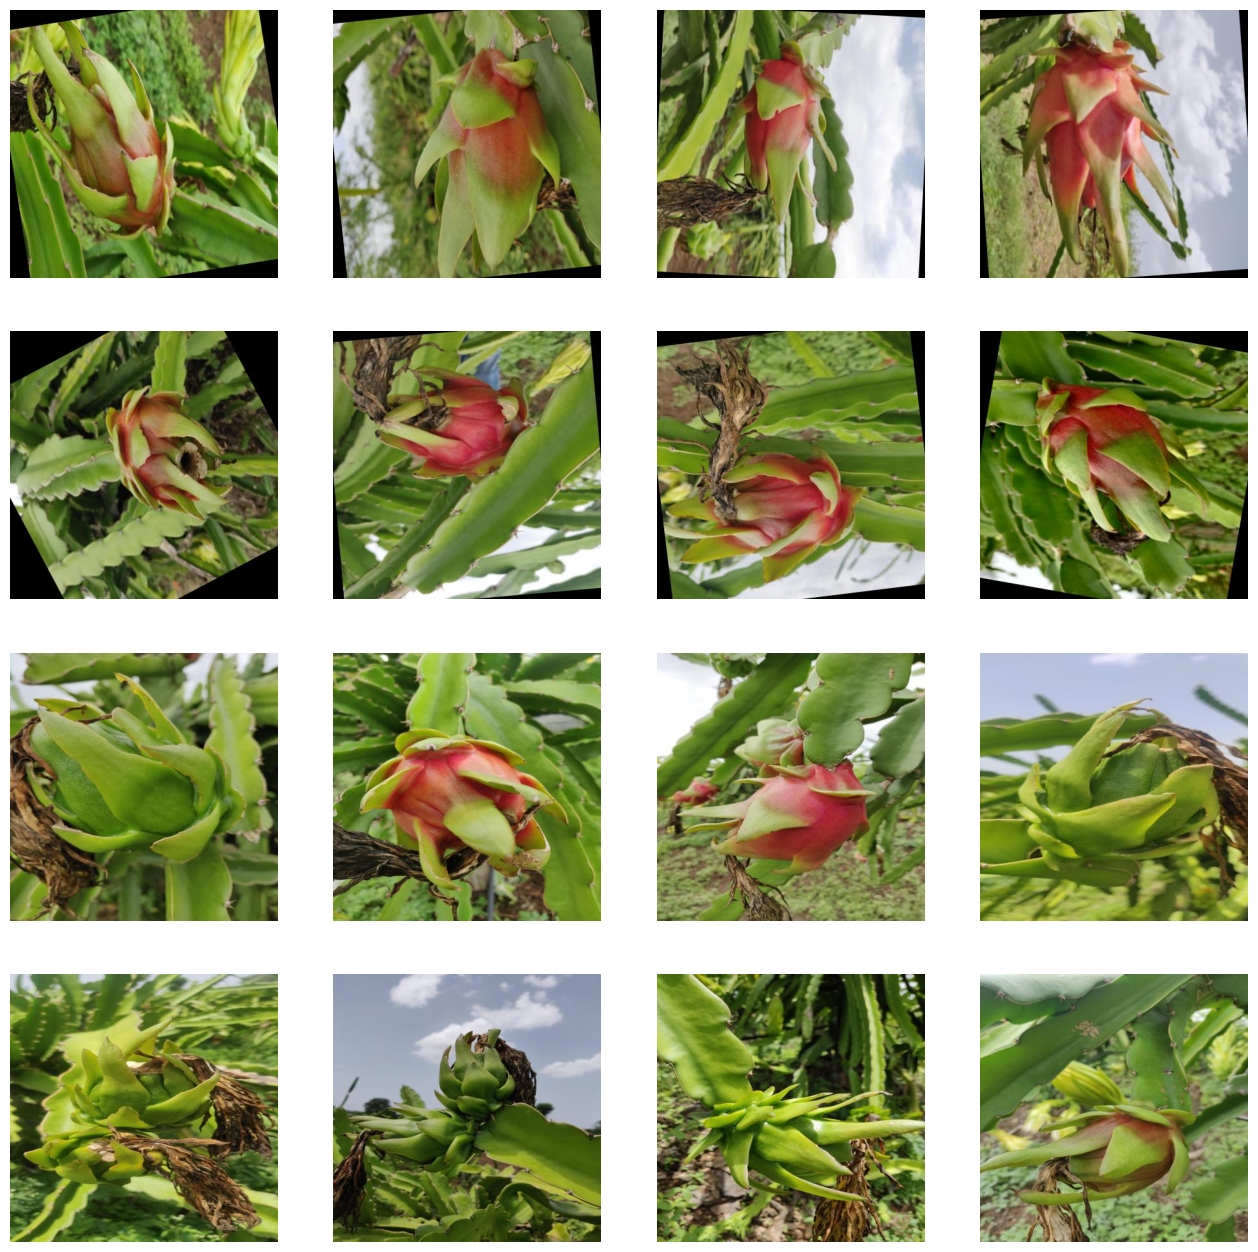

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4


pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_training_pic = [os.path.join(training_dir, fname)
                for fname in training_names_file[pic_index-8:pic_index]]
next_validation_pic = [os.path.join(validation_dir, fname)
                for fname in validation_names_files[pic_index-8:pic_index]]

for i, img_path in enumerate(next_training_pic + next_validation_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# Masukkan folder dragon-fruit-maturity-detection-2 didalam folder content
%cd ..

/


# **TRAINING MODEL**

In [ ]:
# Train YOLOv8n for 100 epochs
!yolo task=detect mode=train model=yolov8n.pt data='/content/dragon-fruit-maturity-detection-2/data.yaml' epochs=50 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 70.8MB/s]
New https://pypi.org/project/ultralytics/8.0.209 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dragon-fruit-maturity-detection-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, strea

In [ ]:
!ls -la /runs/detect/train/

total 9844
drwxr-xr-x 3 root root    4096 Nov 14 06:27 .
drwxr-xr-x 3 root root    4096 Nov 14 05:33 ..
-rw-r--r-- 1 root root    1431 Nov 14 05:33 args.yaml
-rw-r--r-- 1 root root   98987 Nov 14 06:27 confusion_matrix_normalized.png
-rw-r--r-- 1 root root   94372 Nov 14 06:27 confusion_matrix.png
-rw-r--r-- 1 root root 1728483 Nov 14 06:27 events.out.tfevents.1699940022.4c6b07b47b0f.3730.0
-rw-r--r-- 1 root root  122553 Nov 14 06:27 F1_curve.png
-rw-r--r-- 1 root root  242104 Nov 14 05:33 labels_correlogram.jpg
-rw-r--r-- 1 root root  254182 Nov 14 05:33 labels.jpg
-rw-r--r-- 1 root root  103065 Nov 14 06:27 P_curve.png
-rw-r--r-- 1 root root   91064 Nov 14 06:27 PR_curve.png
-rw-r--r-- 1 root root  119877 Nov 14 06:27 R_curve.png
-rw-r--r-- 1 root root   17136 Nov 14 06:27 results.csv
-rw-r--r-- 1 root root  303655 Nov 14 06:27 results.png
-rw-r--r-- 1 root root  580329 Nov 14 05:34 train_batch0.jpg
-rw-r--r-- 1 root root  532506 Nov 14 05:34 train_batch1.jpg
-rw-r--r-- 1 root root  

In [ ]:
!cat /runs/detect/train/results.csv | head -100

                  epoch,         train/box_loss,         train/cls_loss,         train/dfl_loss,   metrics/precision(B),      metrics/recall(B),       metrics/mAP50(B),    metrics/mAP50-95(B),           val/box_loss,           val/cls_loss,           val/dfl_loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.3944,                 2.1007,                 1.8329,                0.73184,                 0.7696,                0.77743,                0.28125,                 1.8856,                 3.0433,                 2.5096,             0.00055256,             0.00055256,             0.00055256
                      2,                 1.4371,                 1.6398,                 1.8287,                0.54982,                0.62324,                0.60809,                0.17121,                  2.332,                 1.9738,                 3.3048,              0.0010863,              0.0010863,              0.

# **VALIDATION MODEL**

In [ ]:
# Validate YOLOv8n
!yolo task=detect mode=val model='runs/detect/train/weights/best.pt' data='/content/dragon-fruit-maturity-detection-2/data.yaml'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/dragon-fruit-maturity-detection-2/valid/labels.cache... 412 images, 2 backgrounds, 0 corrupt: 100% 412/412 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:05<00:00,  4.41it/s]
                   all        412        435      0.942      0.965       0.98      0.581
                   raw        412        213      0.953      0.957       0.98      0.586
                  ripe        412        222      0.931      0.972      0.979      0.577
Speed: 0.9ms preprocess, 4.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# **PREDICT DATA USING IMAGE**

In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model='runs/detect/train/weights/best.pt' source='/content/dragon-fruit-maturity-detection-2/test/images/IMG_20210710_123347_jpg.rf.dcd9d0d737c1caa82f0bce762e4a4b45.jpg'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/dragon-fruit-maturity-detection-2/test/images/IMG_20210710_123347_jpg.rf.dcd9d0d737c1caa82f0bce762e4a4b45.jpg: 640x640 1 raw, 10.4ms
Speed: 4.3ms preprocess, 10.4ms inference, 111.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model='runs/detect/train/weights/best.pt' source='/content/dragon-fruit-maturity-detection-2/test/images/DSC_0256_JPG_jpg.rf.3b3c34c81c507c0d04477010d5edf610.jpg'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/dragon-fruit-maturity-detection-2/test/images/DSC_0256_JPG_jpg.rf.3b3c34c81c507c0d04477010d5edf610.jpg: 640x640 1 ripe, 9.7ms
Speed: 3.9ms preprocess, 9.7ms inference, 118.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


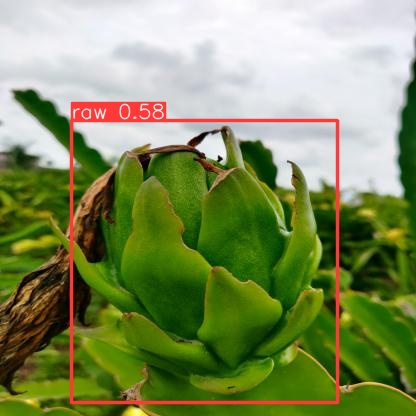

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

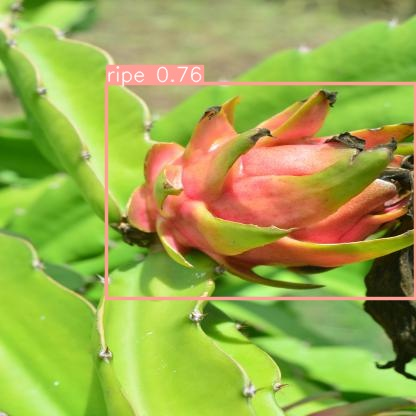

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# **Result Evaluation**

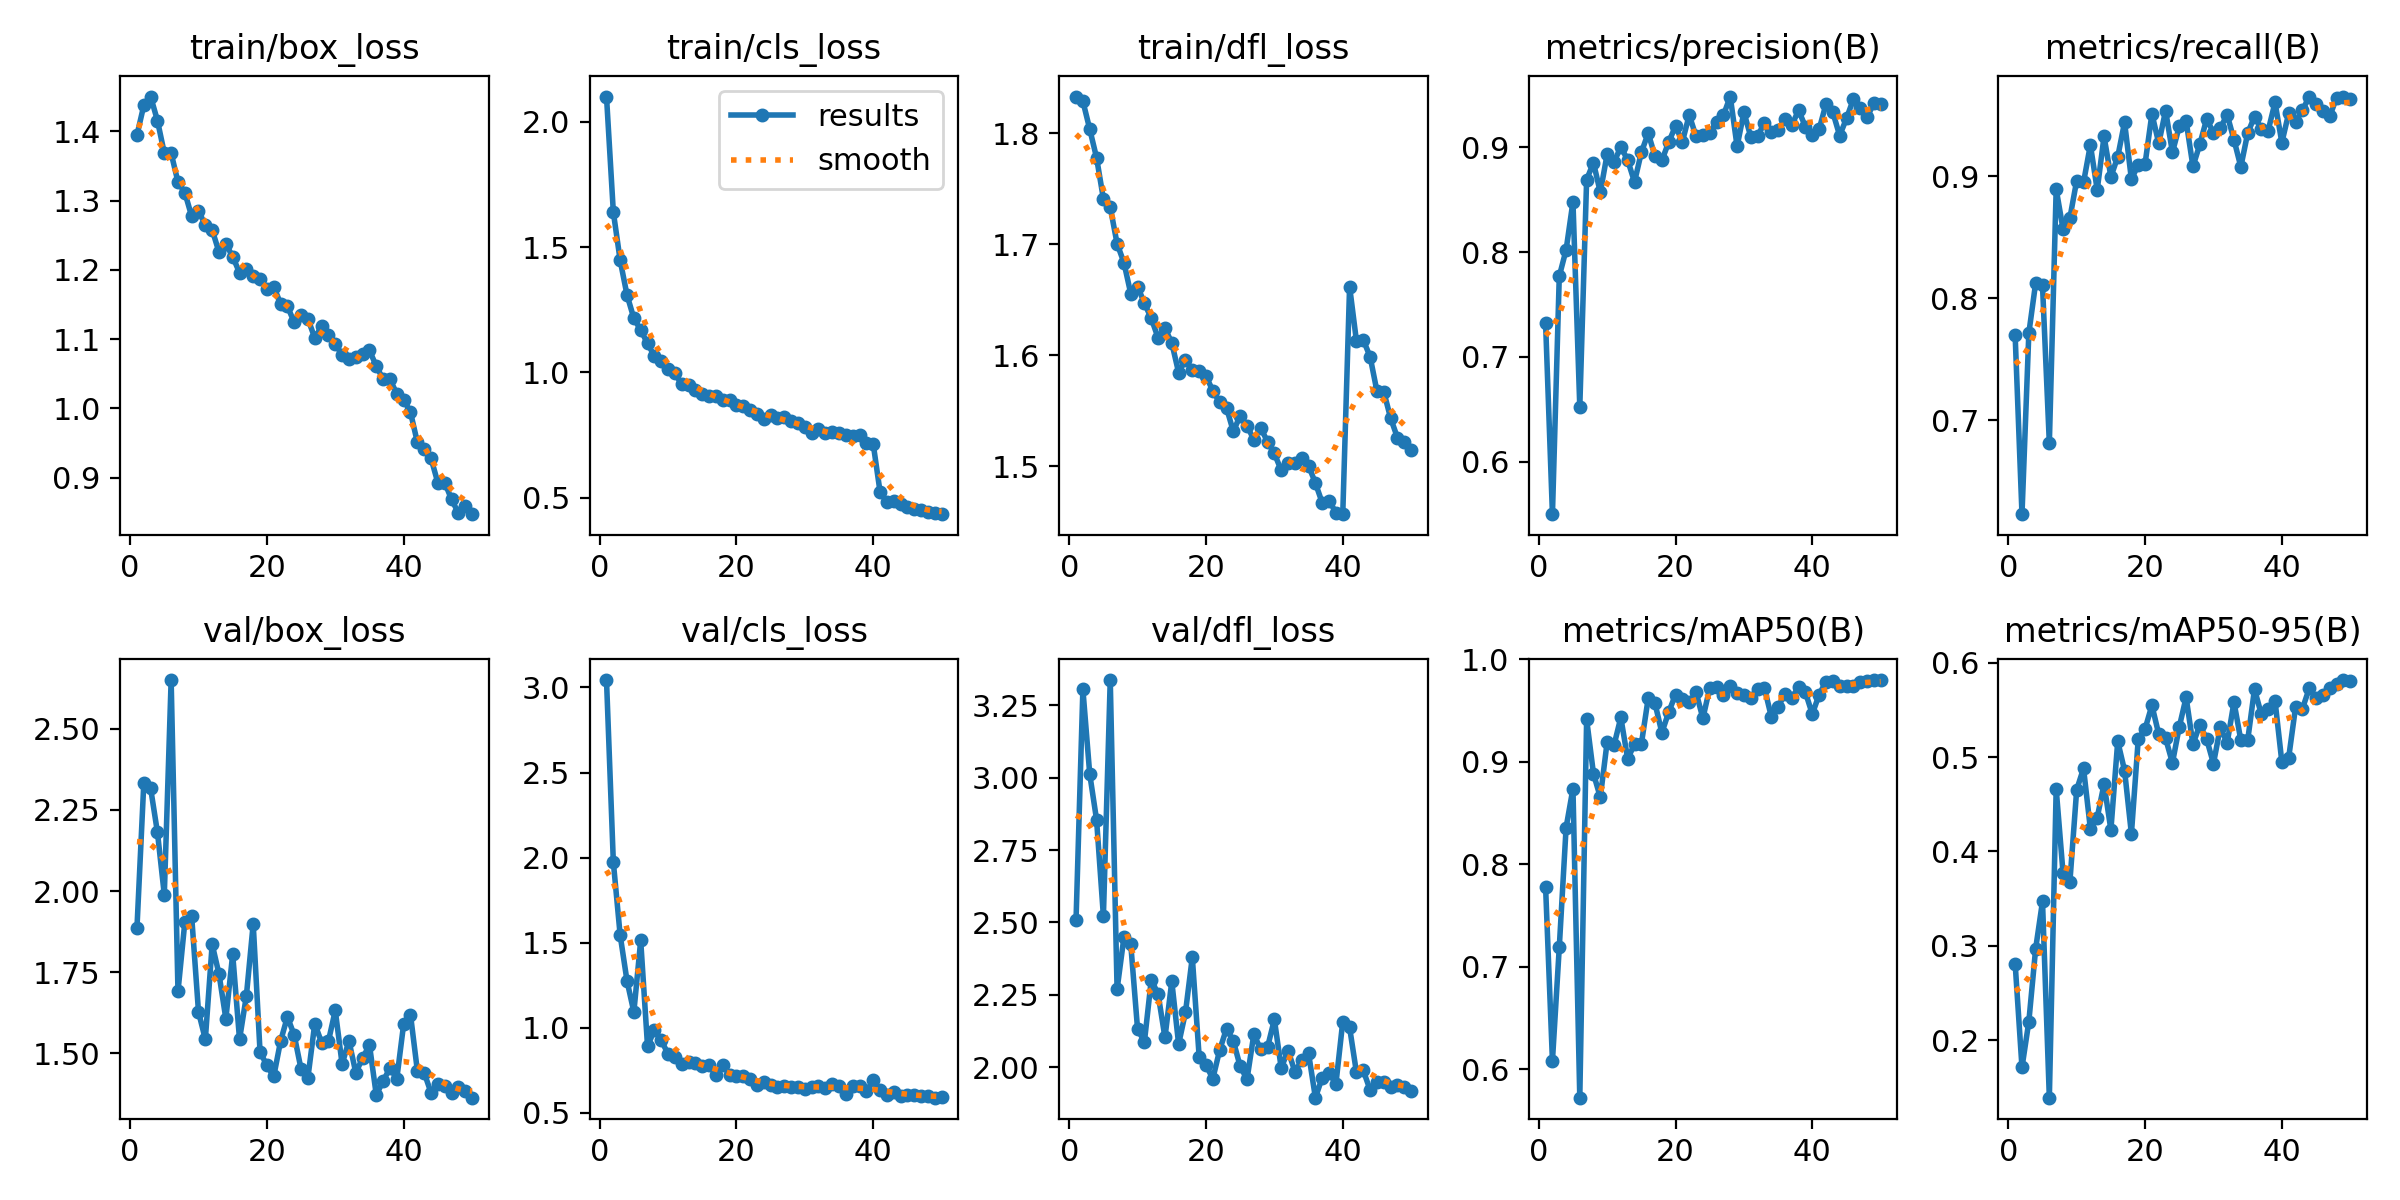

In [ ]:
Image(filename=f'/runs/detect/train/results.png', width=1200)

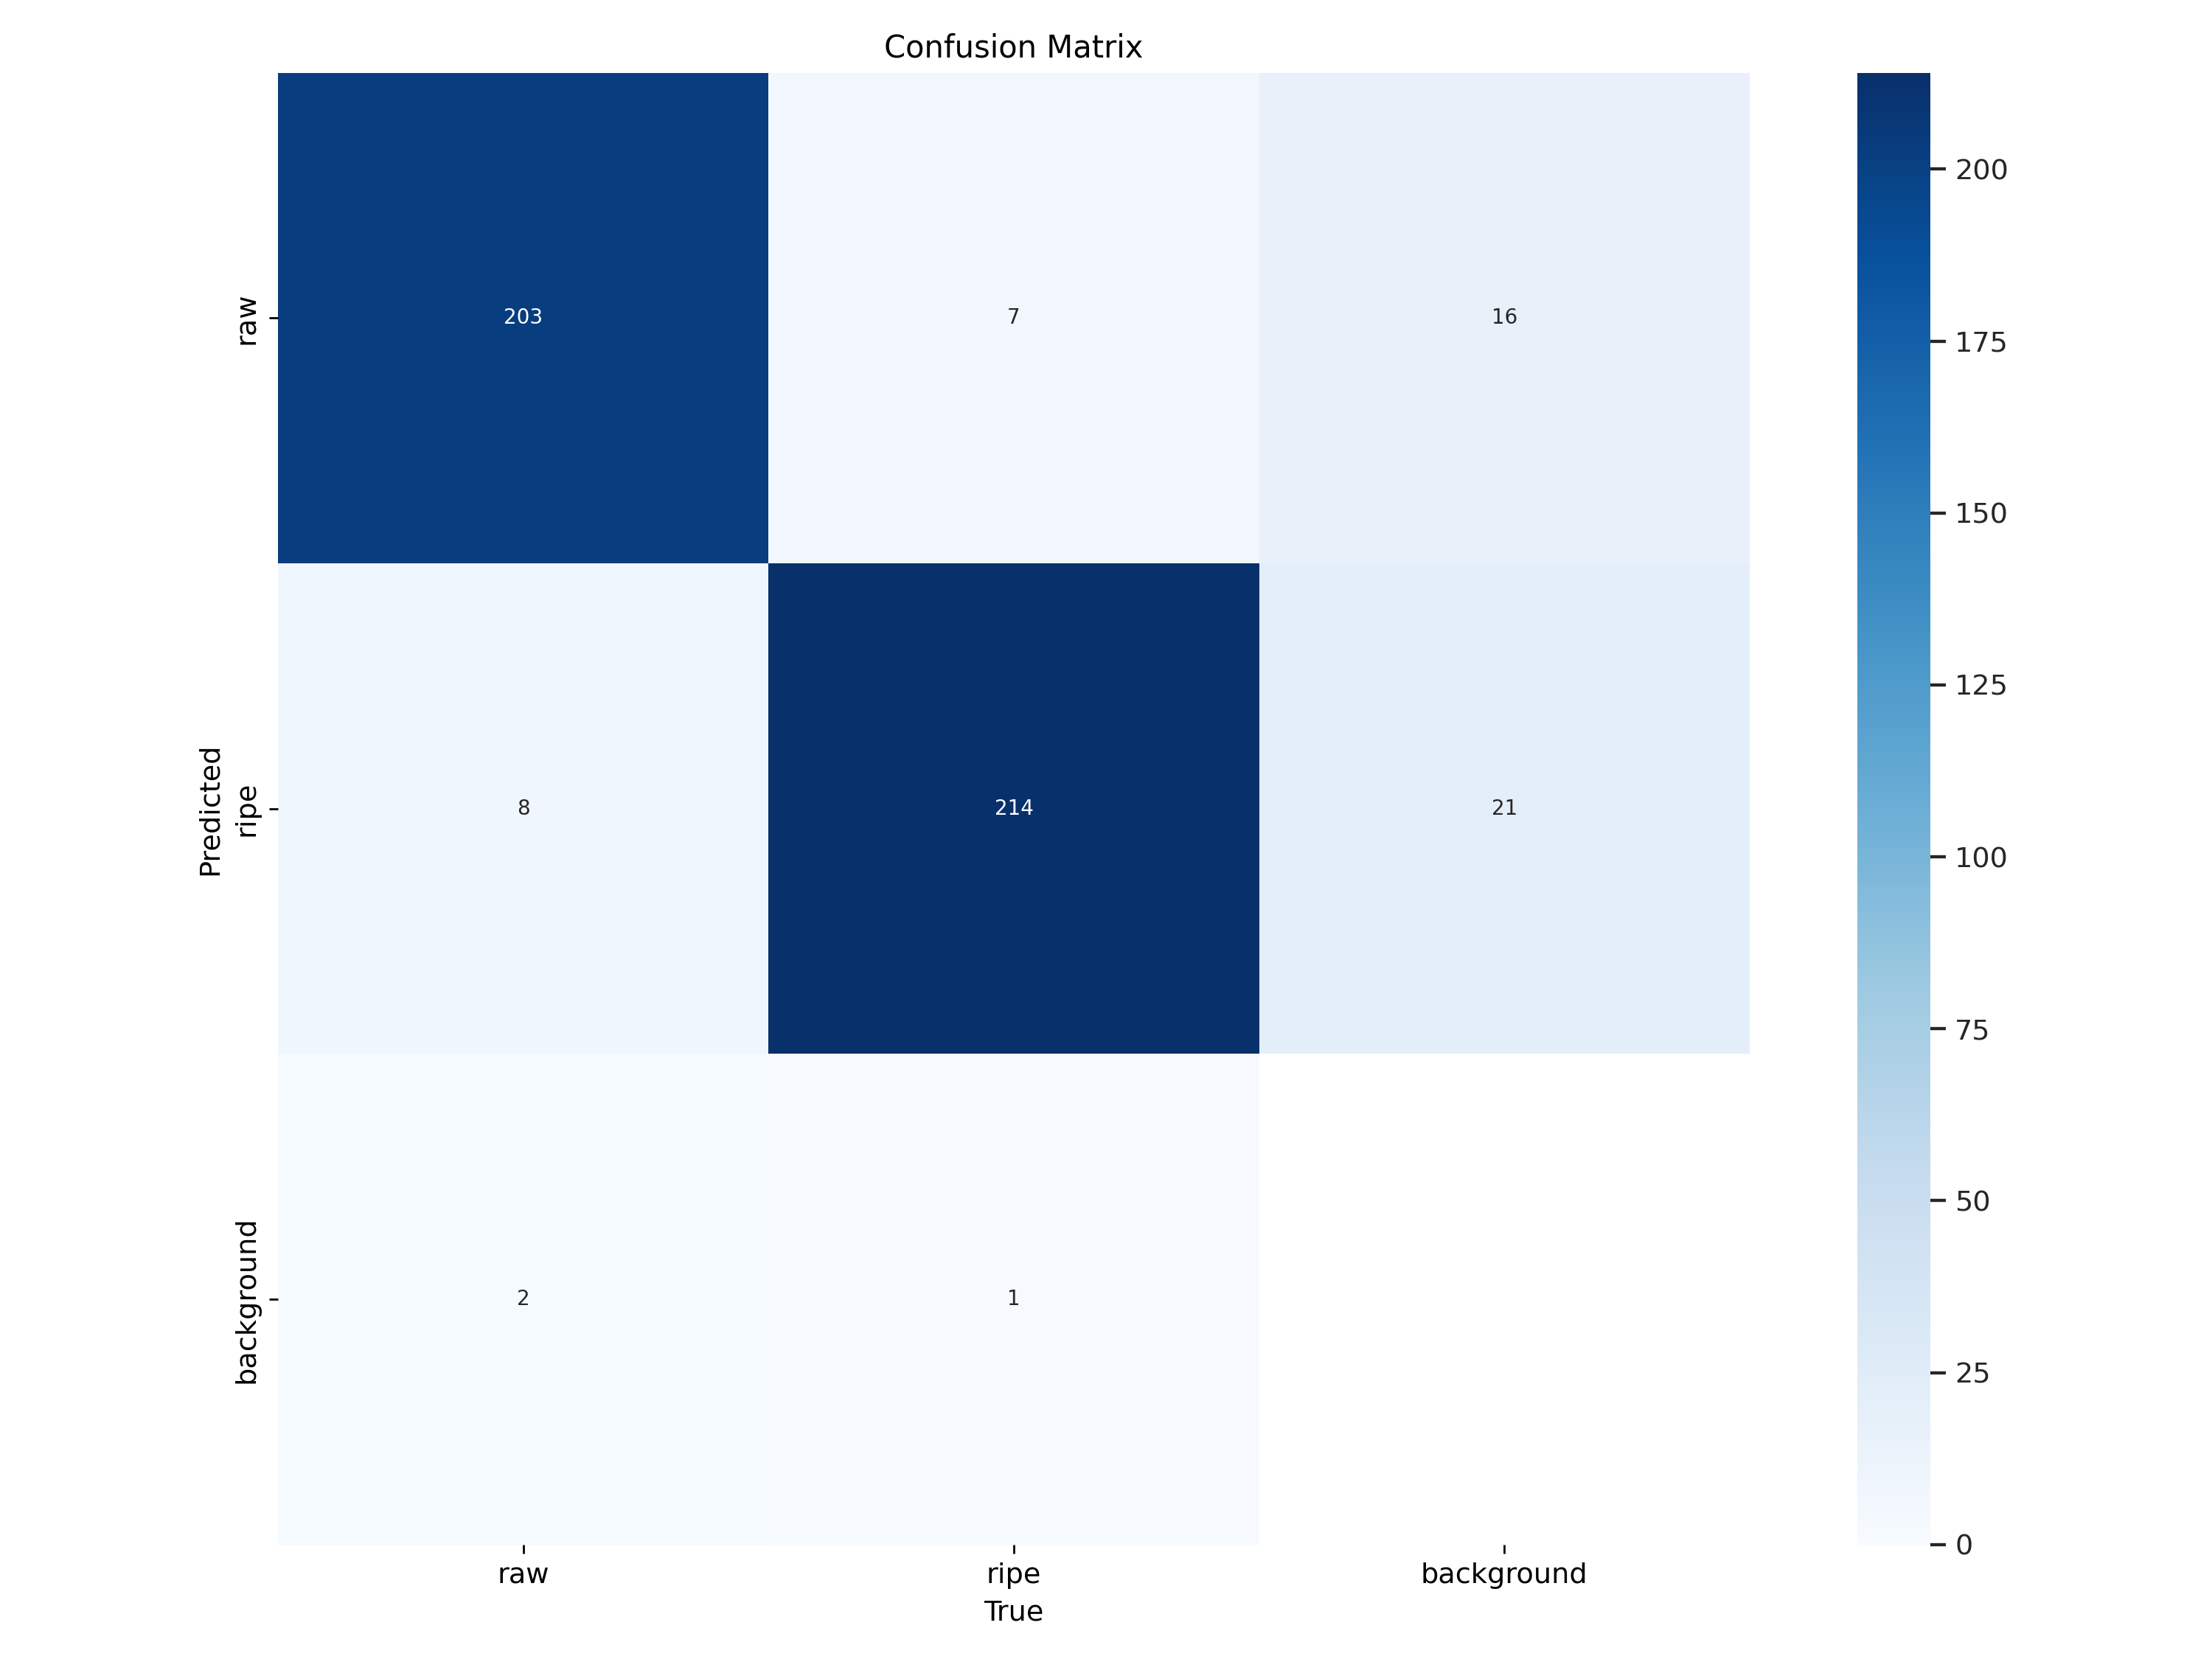

In [ ]:
Image(filename=f'/runs/detect/train/confusion_matrix.png', width=1000)

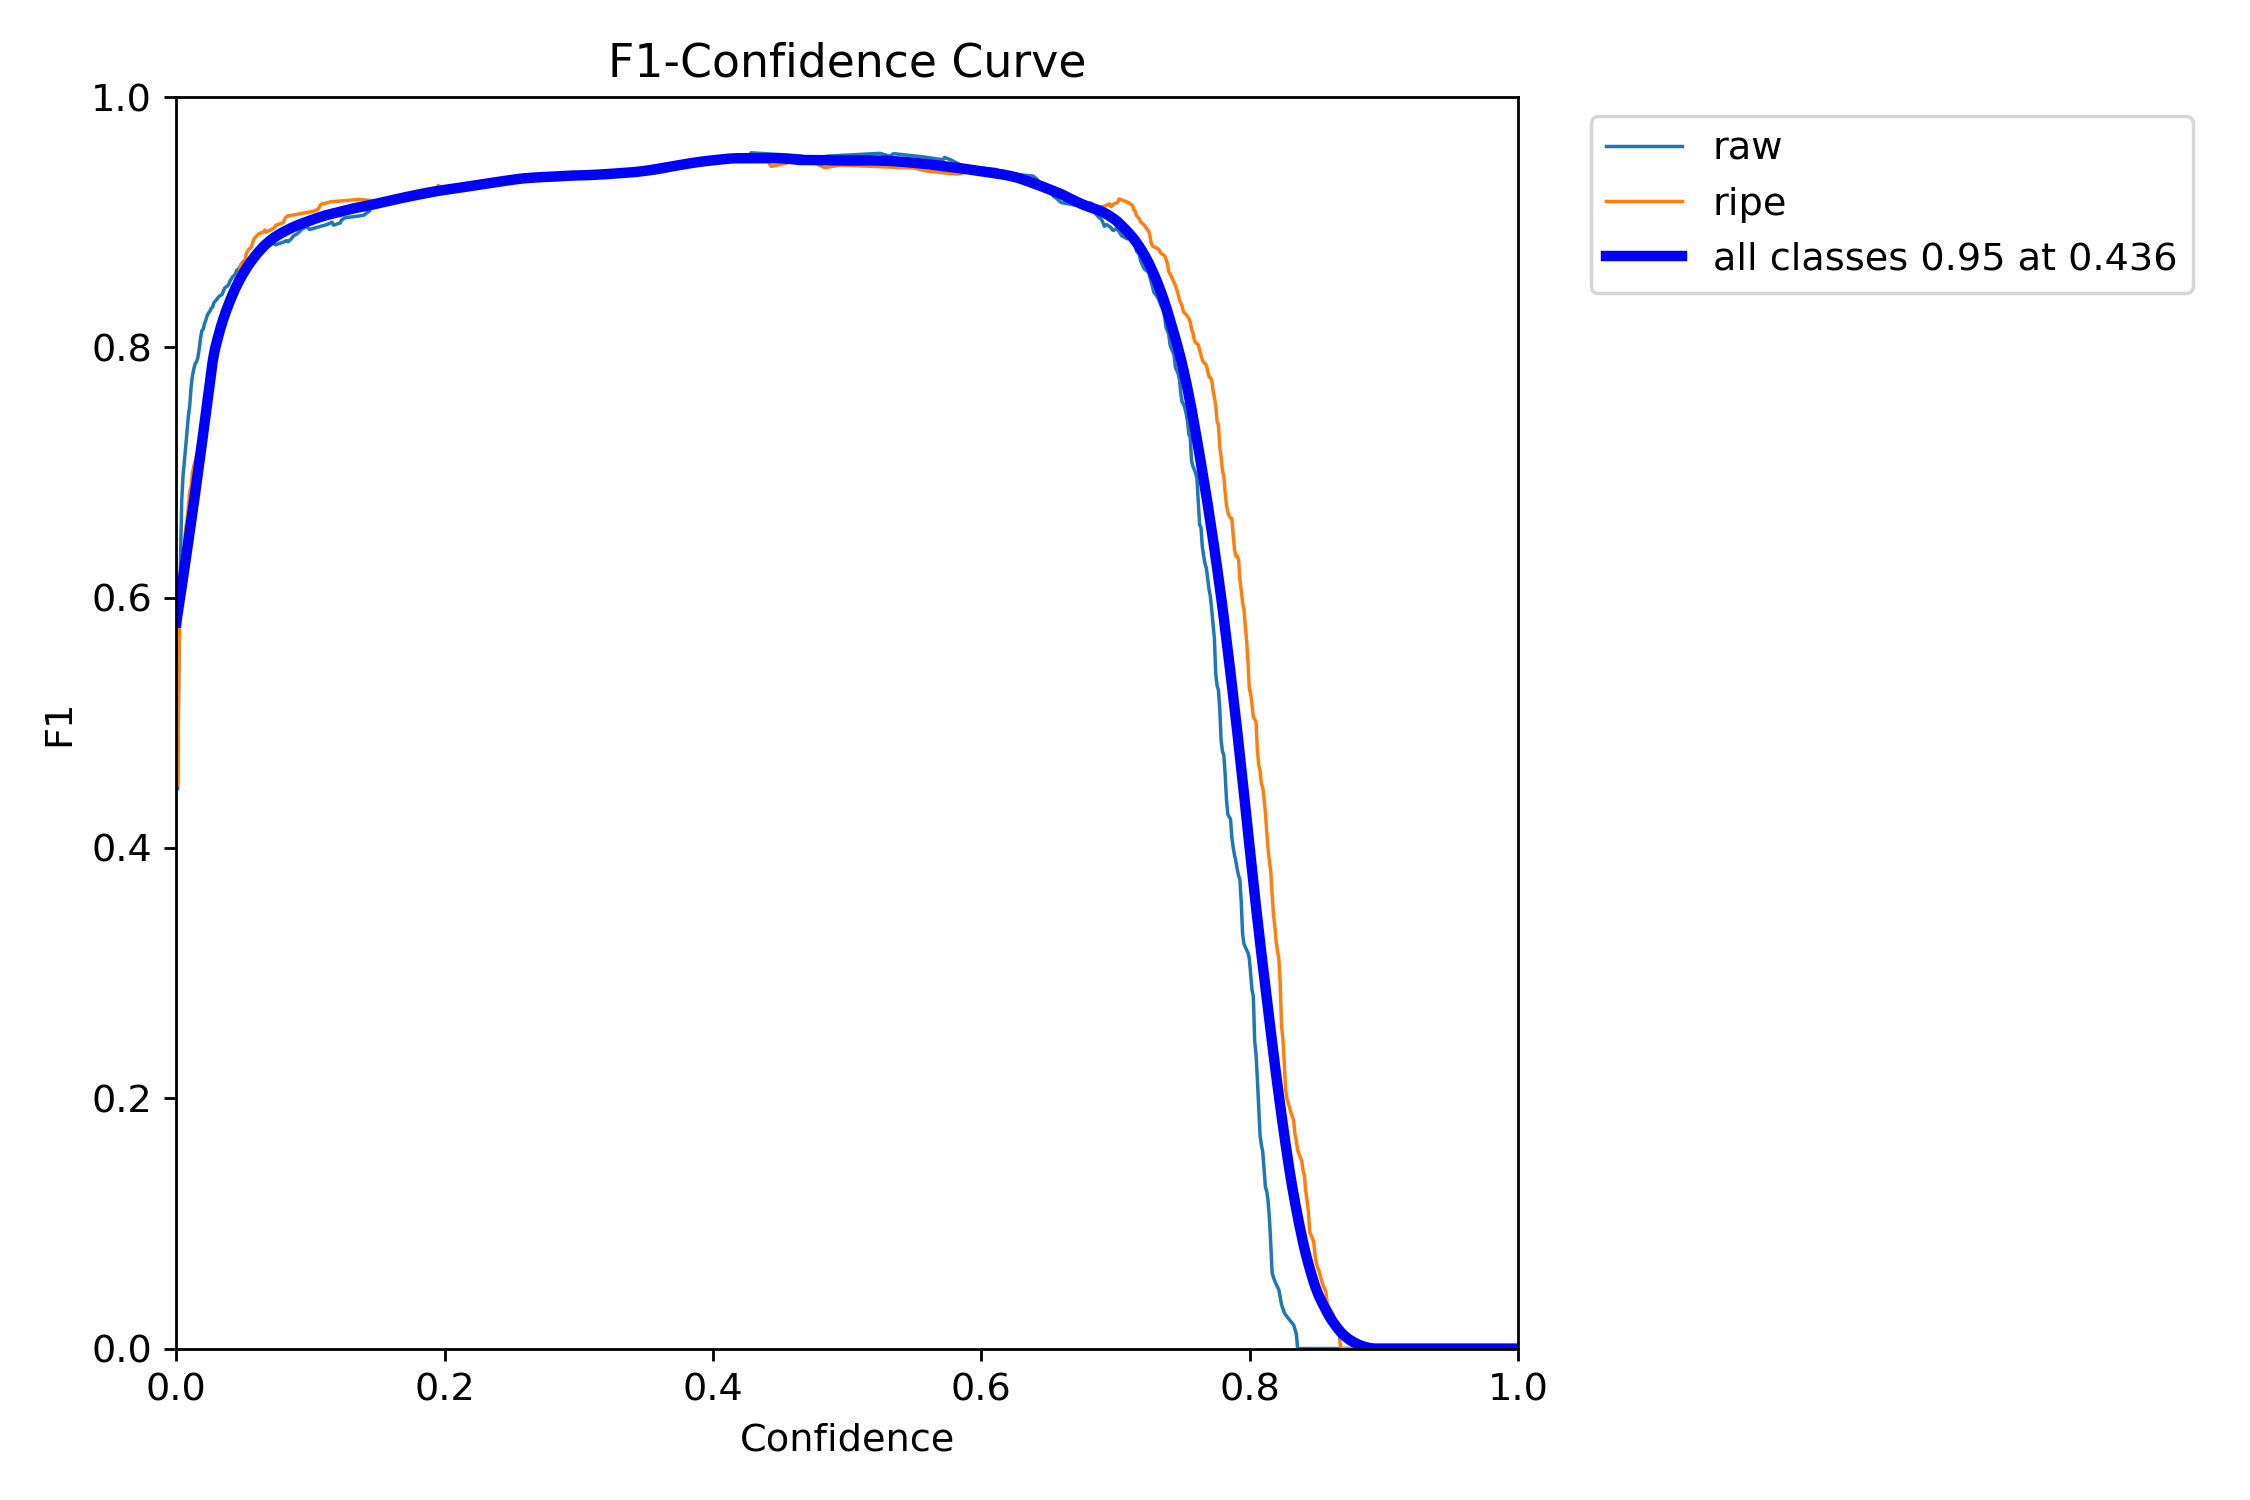

In [ ]:
Image(filename=f'/runs/detect/train/F1_curve.png', width=1000)

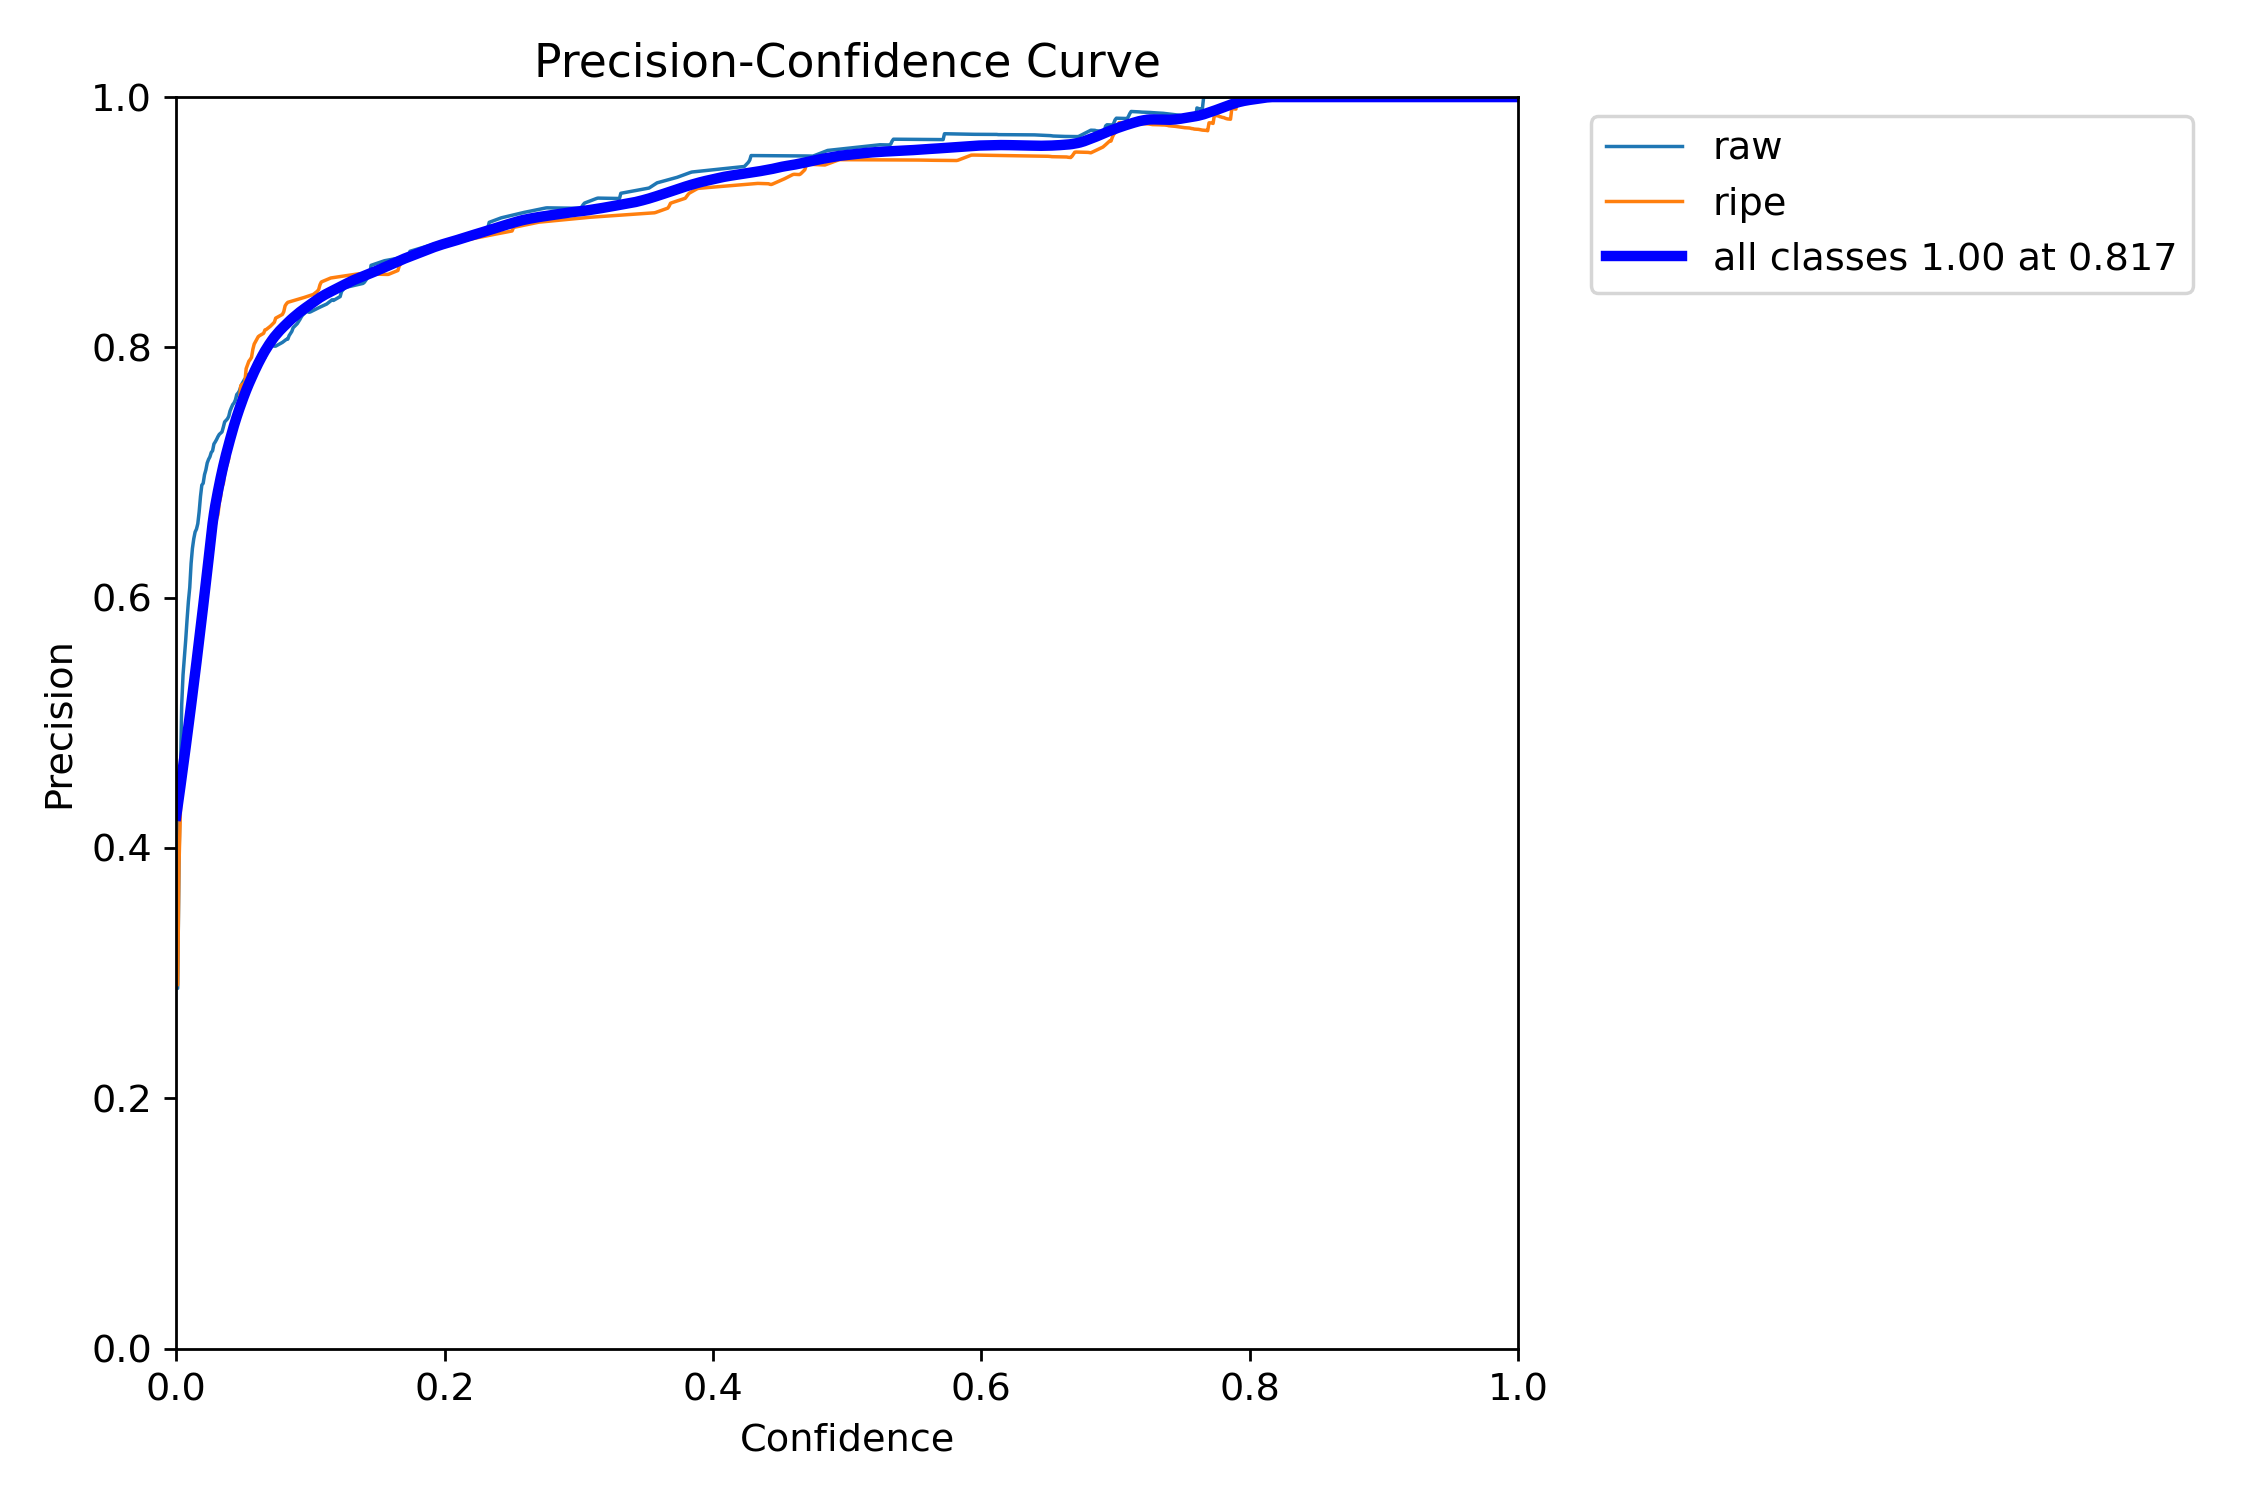

In [ ]:
Image(filename=f'/runs/detect/train/P_curve.png', width=1000)

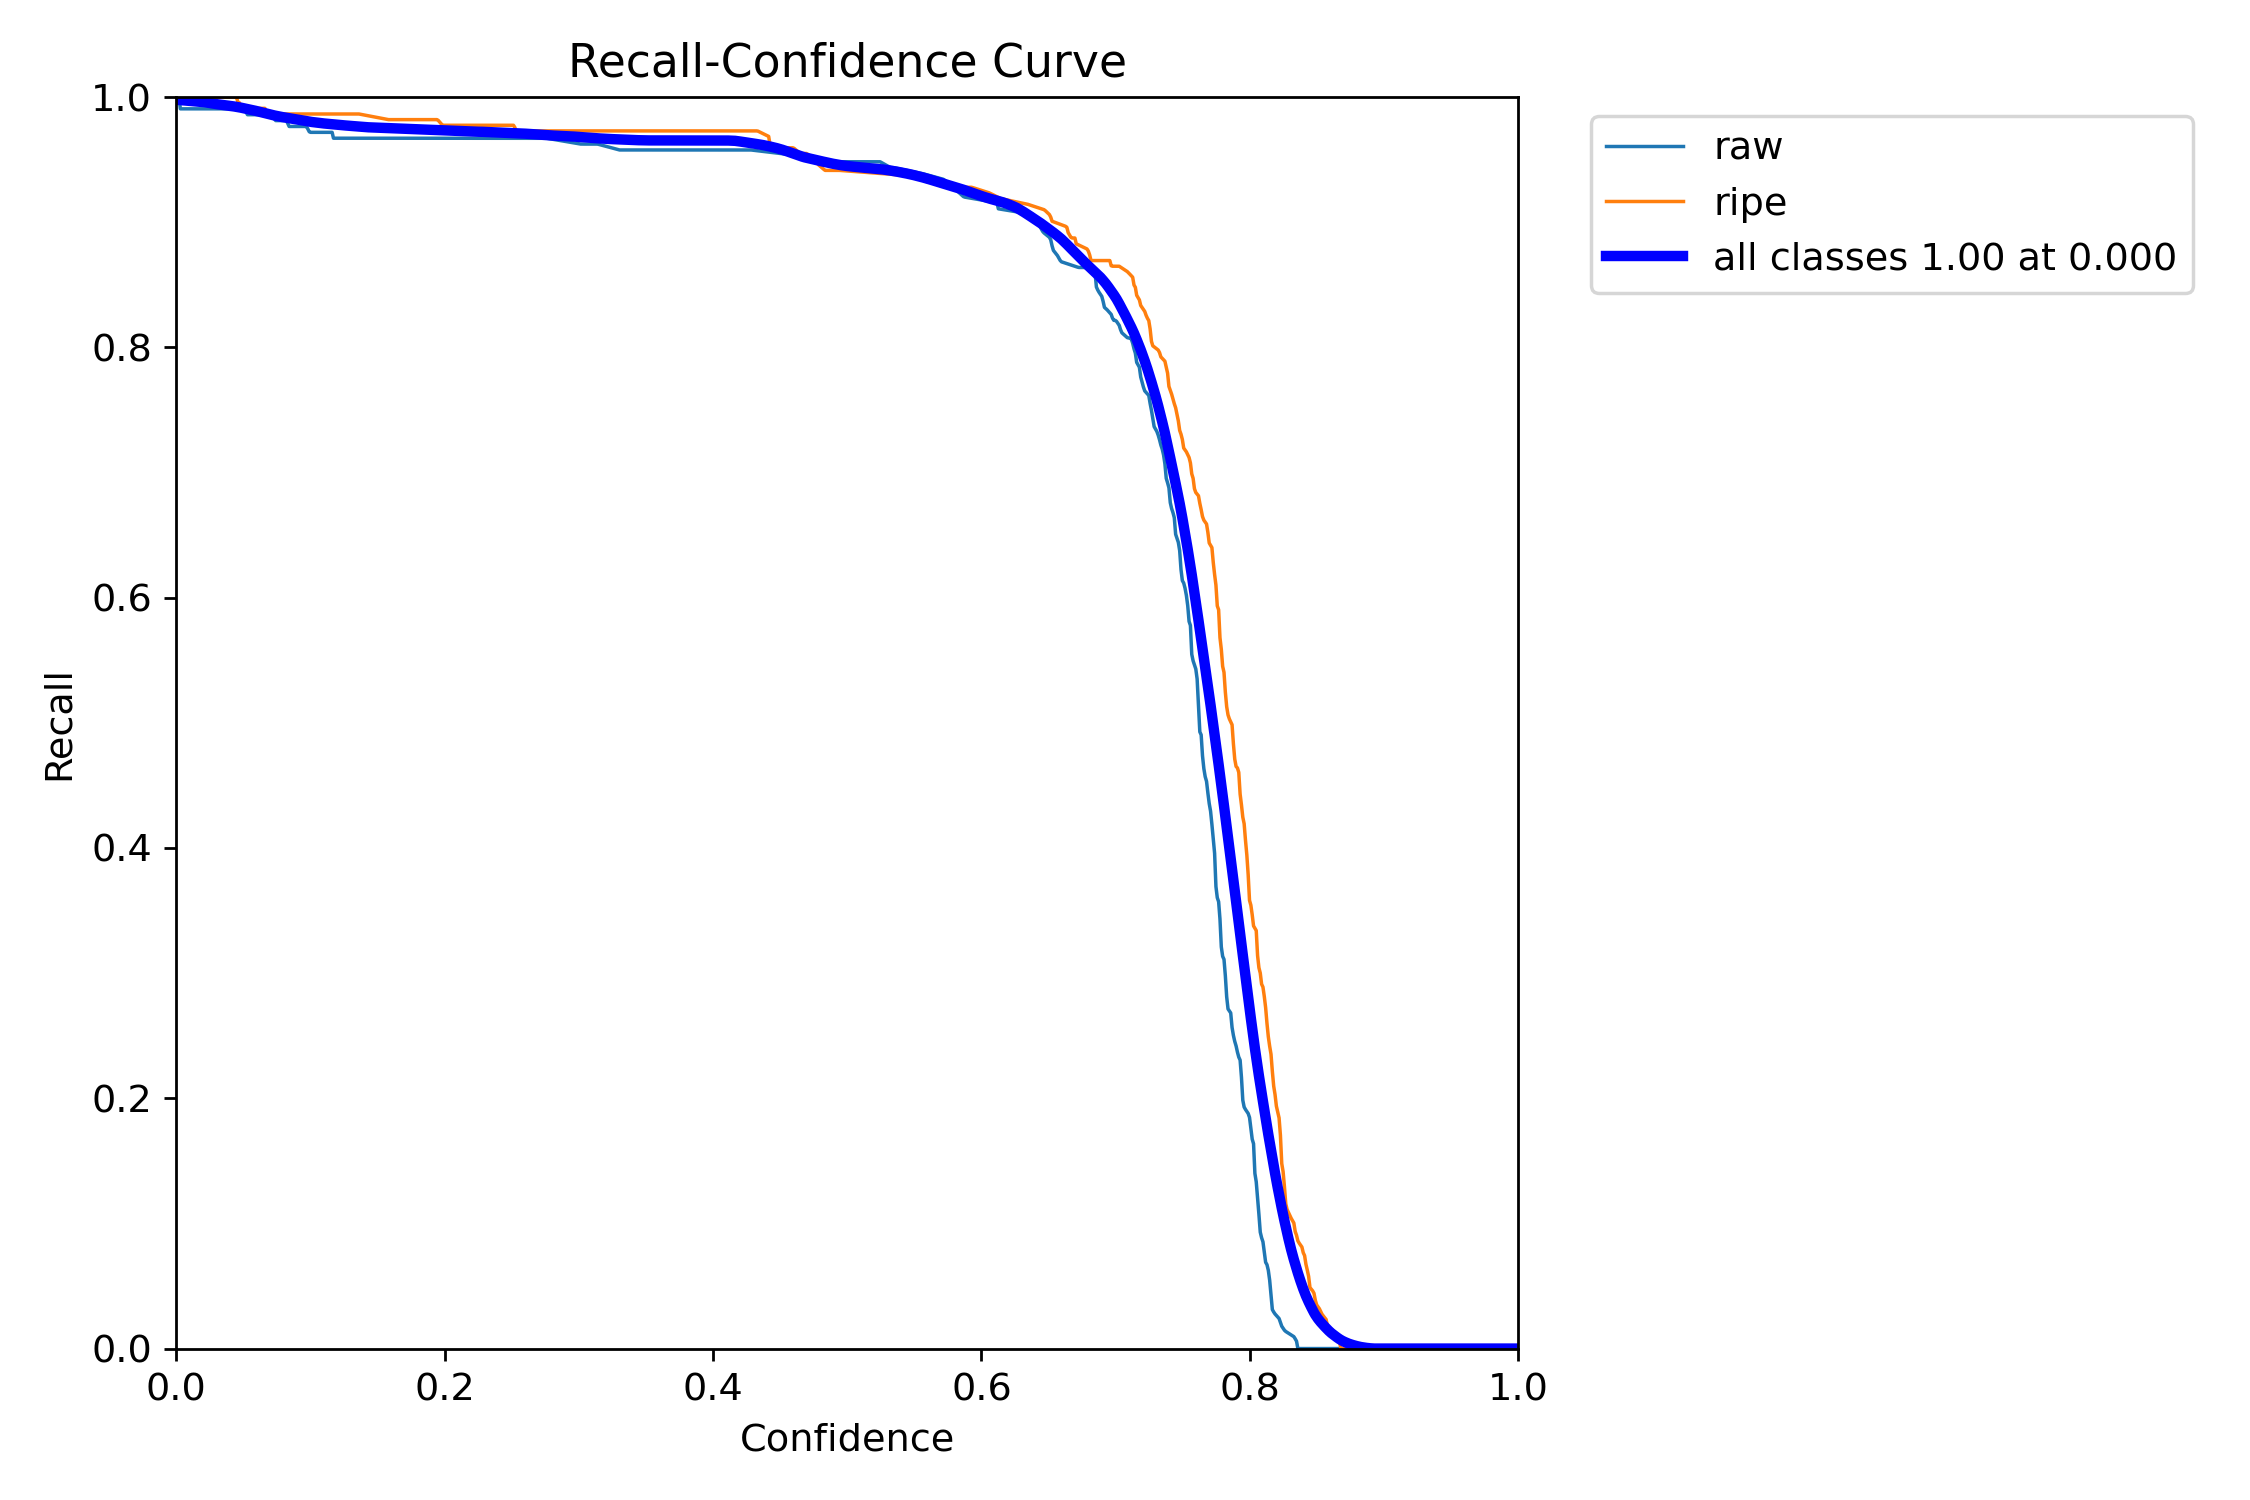

In [ ]:
Image(filename=f'/runs/detect/train/R_curve.png', width=1000)

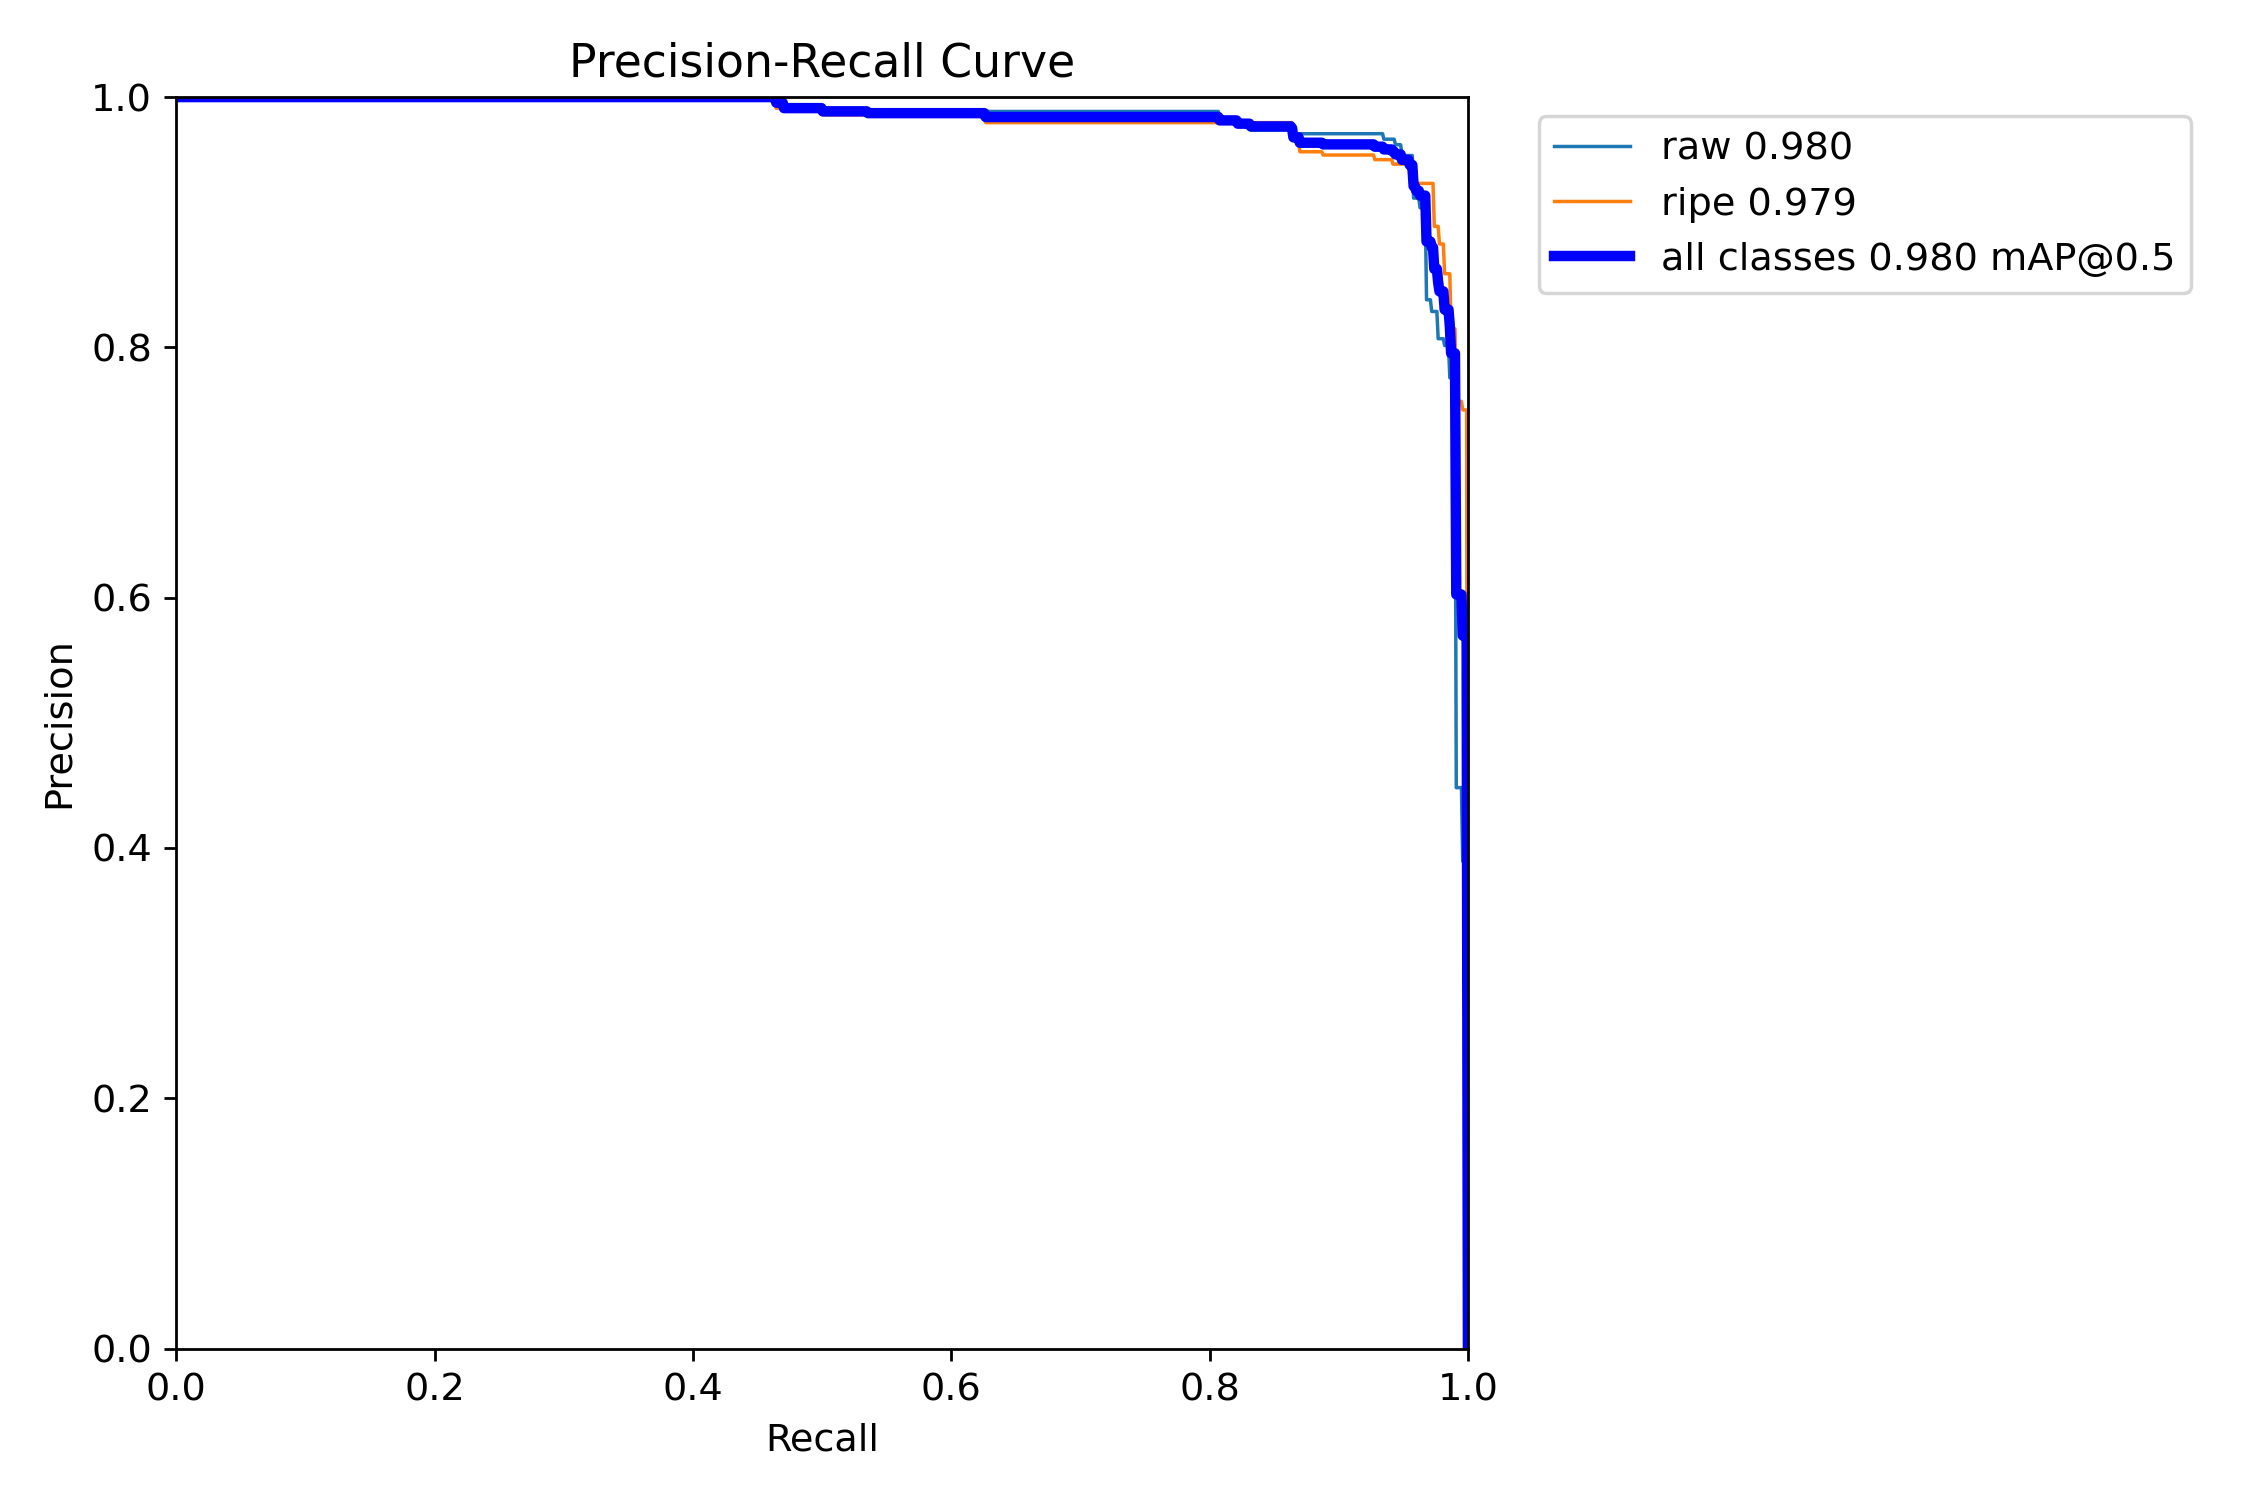

In [ ]:
Image(filename=f'/runs/detect/train/PR_curve.png', width=1000)

# **SAVE MODEL**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import shutil
# Source folder
source_folder = "/runs/detect/train"
# Destination folder in Google Drive
destination_folder = "/content/gdrive/MyDrive/Model Dregen"
shutil.copytree(source_folder, destination_folder)

'/content/gdrive/MyDrive/Model Dregen'